In [1]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [2]:
import random
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.datasets import make_blobs 
%matplotlib inline

In [3]:
df = pd.read_csv('melb_data.csv')

In [4]:
df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,...,2.0,2.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,...,2.0,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,...,2.0,4.0,436.0,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,...,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0


In [5]:
df.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [6]:
df['Car'].replace(np.nan, round(df['Car'].mean()), inplace=True)

In [7]:
df['BuildingArea'].replace(np.nan, round(df['BuildingArea'].mean()), inplace=True)

In [8]:
df.dropna(subset=['YearBuilt'], inplace=True)

In [9]:
df_new = df[['Suburb', 'Rooms', 'Type', 'Price', 'Date', 'Distance', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'Regionname', 'Propertycount']]

In [10]:
df_new['YearBuilt'].astype(int)
df_new['Price'].astype(int)

1        1035000
2        1465000
4        1600000
6        1876000
7        1636000
          ...   
13575    1245000
13576    1031000
13577    1170000
13578    2500000
13579    1285000
Name: Price, Length: 8205, dtype: int64

<Figure size 1000x600 with 0 Axes>

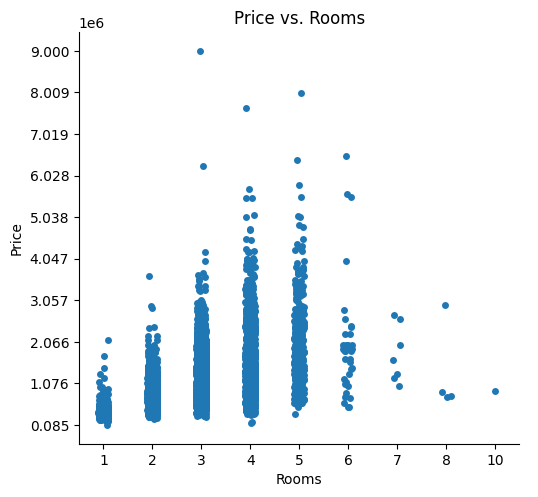

In [100]:
tick_locations = np.linspace(df_new['Price'].min(), df_new['Price'].max(), num=10)
plt.figure(figsize=(10, 6))
sns.catplot(x='Rooms', y='Price', data=df_new)
plt.yticks(tick_locations)
plt.title('Price vs. Rooms')
plt.xlabel('Rooms')
plt.ylabel('Price')
plt.show()

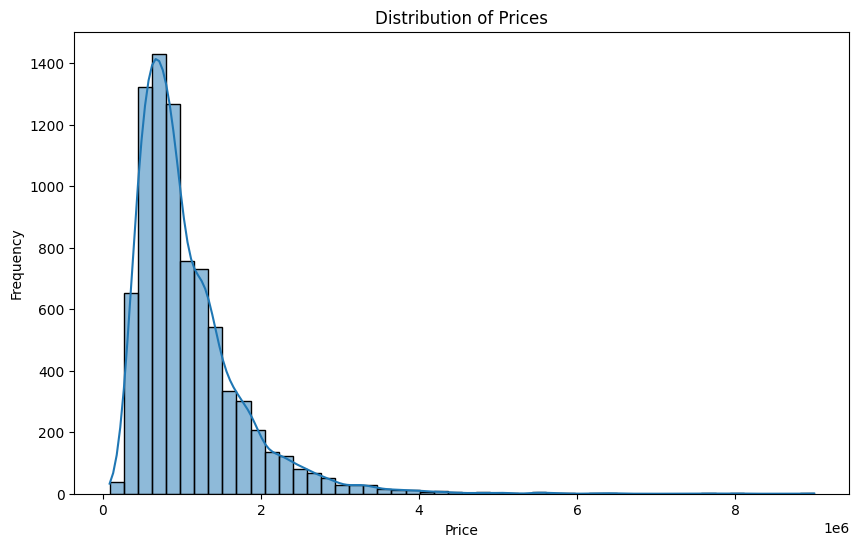

In [84]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], bins=50, kde=True)
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [11]:
mean_prices_by_year = df_new.groupby('YearBuilt')['Price'].mean().astype(int).reset_index()

In [12]:
mean_prices_by_year['YearBuilt'] = mean_prices_by_year['YearBuilt'].astype(int)
mean_prices_by_year['Price'] = mean_prices_by_year['Price'].astype(int)

In [13]:
mean_prices_by_year

,YearBuilt,Price
0,1196,1200000
1,1830,855000
2,1850,1179500
3,1854,3310000
4,1856,2260000
...,...,...
139,2014,921915
140,2015,1231484
141,2016,1523655
142,2017,1037972


In [14]:
import seaborn as sns

Relation between Year Built and

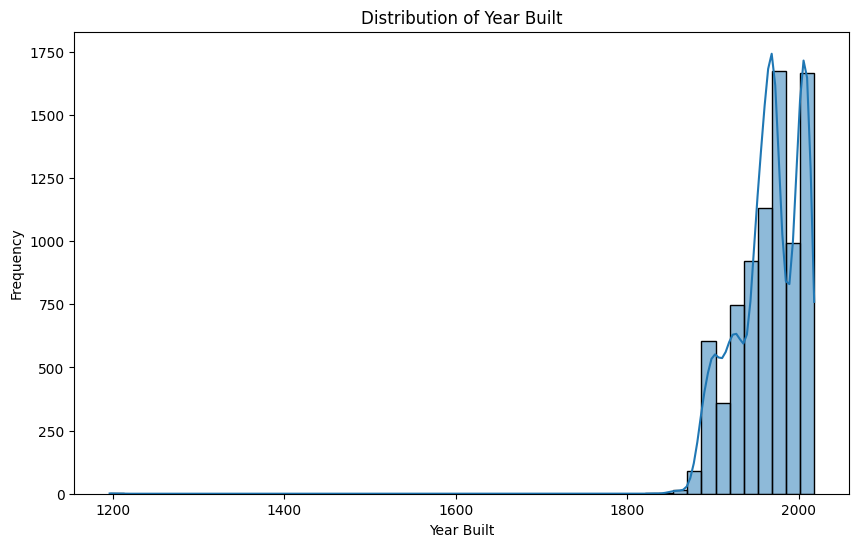

In [65]:
plt.figure(figsize=(10, 6))
sns.histplot(df['YearBuilt'], bins=50, kde=True)
plt.title('Distribution of Year Built')
plt.xlabel('Year Built')
plt.ylabel('Frequency')
plt.show()

In [85]:
mean_by_suburb = df.groupby('Suburb')['Price'].mean().astype(int).reset_index()

In [74]:
median_year = df['YearBuilt'].median()

# Замена аномальных значений
df.loc[df['YearBuilt'] == 1196, 'YearBuilt'] = median_year
mean_by_year = df.groupby('YearBuilt')['Price'].mean().astype(int).reset_index()
mean_by_year

,YearBuilt,Price
0,1830.0,855000
1,1850.0,1179500
2,1854.0,3310000
3,1856.0,2260000
4,1857.0,2200000
...,...,...
138,2014.0,921915
139,2015.0,1231484
140,2016.0,1523655
141,2017.0,1037972


<Figure size 2000x800 with 0 Axes>

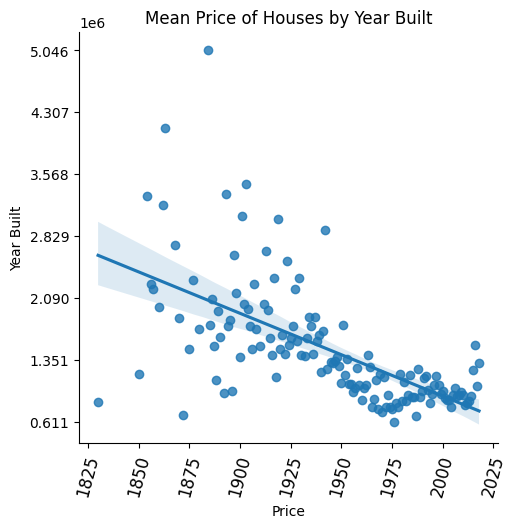

In [75]:
tick_locations = np.linspace(mean_by_year['Price'].min(), mean_by_year['Price'].max(), num=7)
mean_by_year.sort_values(by='Price', ascending=True)
plt.figure(figsize=(20, 8))
sns.lmplot(x='YearBuilt', y='Price', data=mean_by_year)
plt.xticks(rotation=75, fontsize=12)
plt.yticks(tick_locations)
plt.xlabel('Price')
plt.ylabel('Year Built')
plt.title('Mean Price of Houses by Year Built')
plt.show()

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [21]:
df_normalized = pd.get_dummies(df_new, columns=['Suburb', 'Type', 'Regionname'], drop_first=True)
df_normalized

,Rooms,Price,Date,Distance,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Propertycount,...,Suburb_Yarraville,Type_t,Type_u,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
1,2,1035000.0,4/02/2016,2.5,1.0,0.0,156.0,79.0,1900.0,4019.0,...,False,False,False,False,True,False,False,False,False,False
2,3,1465000.0,4/03/2017,2.5,2.0,0.0,134.0,150.0,1900.0,4019.0,...,False,False,False,False,True,False,False,False,False,False
4,4,1600000.0,4/06/2016,2.5,1.0,2.0,120.0,142.0,2014.0,4019.0,...,False,False,False,False,True,False,False,False,False,False
6,3,1876000.0,7/05/2016,2.5,2.0,0.0,245.0,210.0,1910.0,4019.0,...,False,False,False,False,True,False,False,False,False,False
7,2,1636000.0,8/10/2016,2.5,1.0,2.0,256.0,107.0,1890.0,4019.0,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,4,1245000.0,26/08/2017,16.7,2.0,2.0,652.0,152.0,1981.0,7392.0,...,False,False,False,False,False,False,True,False,False,False
13576,3,1031000.0,26/08/2017,6.8,2.0,2.0,333.0,133.0,1995.0,6380.0,...,False,False,False,False,False,False,False,False,True,False
13577,3,1170000.0,26/08/2017,6.8,2.0,4.0,436.0,152.0,1997.0,6380.0,...,False,False,False,False,False,False,False,False,True,False
13578,4,2500000.0,26/08/2017,6.8,1.0,5.0,866.0,157.0,1920.0,6380.0,...,False,False,False,False,False,False,False,False,True,False


In [47]:
lr = LinearRegression()

X = df_normalized.drop(columns=['Price', 'Date'])
Y = df_normalized[['Price']]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print('X Train shape:', X_train.shape, 'Y_test:', Y_train.shape)

X Train shape: (6564, 318) Y_test: (6564, 1)


In [48]:
lr.fit(X_train, Y_train)

LinearRegression()

In [49]:
yhat = lr.predict(X_test)

In [50]:
yhat[0:5]

array([[1532984.08666819],
       [1700280.08666819],
       [ 653432.08666819],
       [1329976.08666819],
       [ 682552.08666819]])

In [51]:
Y_test.head()

,Price
12086,1400000.0
12672,1775000.0
10847,605000.0
6400,511000.0
919,870000.0


In [52]:
from sklearn.metrics import mean_squared_error, r2_score

In [53]:
mse = mean_squared_error(Y_test, yhat)
r2 = r2_score(Y_test, yhat)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 6.067829444354529e+35
R^2 Score: -1.3813404910420002e+24


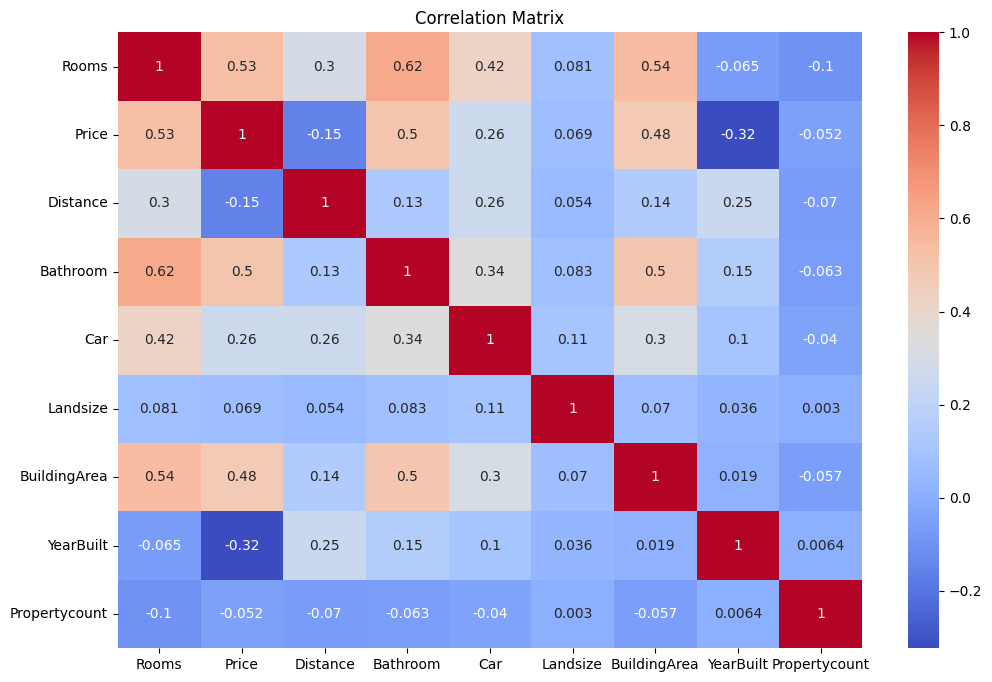

In [54]:
correlation_matrix = df_new.drop(columns=['Suburb',  'Type', 'Regionname', 'Date']).corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [55]:
from sklearn.preprocessing import PolynomialFeatures

In [76]:
lr2 = LinearRegression()

X = df_new[['BuildingArea', 'Bathroom', 'Rooms', 'Car', 'YearBuilt']]
Y = df_new[['Price']]

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(X_poly, Y, test_size=0.2, random_state=2)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print('X Train shape:', X_train.shape, 'Y_test:', Y_train.shape)

X Train shape: (6564, 21) Y_test: (6564, 1)


In [77]:
lr2.fit(X_train, Y_train)

LinearRegression()

In [78]:
yhat = lr2.predict(X_test)

In [79]:
mse = mean_squared_error(Y_test, yhat)
r2 = r2_score(Y_test, yhat)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 206182444558.81235
R^2 Score: 0.530625964650187


In [80]:
yhat[0:5]

array([[1642968.94938553],
       [1287216.25413967],
       [ 764962.98987462],
       [ 599244.80989101],
       [ 946797.54494313]])

In [81]:
Y_test.head()

,Price
12086,1400000.0
12672,1775000.0
10847,605000.0
6400,511000.0
919,870000.0


In [82]:
mean_by_region = df.groupby('Regionname')['Price'].mean().astype(int).reset_index()
mean_by_region

,Regionname,Price
0,Eastern Metropolitan,1097764
1,Eastern Victoria,670225
2,Northern Metropolitan,873450
3,Northern Victoria,589407
4,South-Eastern Metropolitan,922789
5,Southern Metropolitan,1364646
6,Western Metropolitan,862081
7,Western Victoria,403630


([<matplotlib.axis.YTick at 0x3099a2150>,
 [Text(0, 403630.0, '0.4036'),
  Text(0, 563799.3333333334, '0.5638'),
  Text(0, 723968.6666666667, '0.7240'),
  Text(0, 884138.0, '0.8841'),
  Text(0, 1044307.3333333334, '1.0443'),
  Text(0, 1204476.6666666667, '1.2045'),
  Text(0, 1364646.0, '1.3646')])

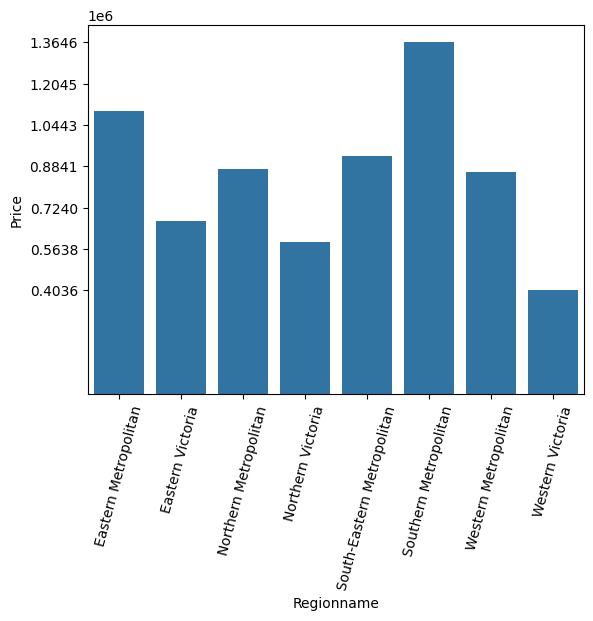

In [83]:
tick_locations = np.linspace(mean_by_region['Price'].min(), mean_by_region['Price'].max(), num=7)
sns.barplot(x='Regionname', y='Price', data=mean_by_region)
plt.xticks(rotation=75)
plt.yticks(tick_locations)